In [1]:
from utils.load_dataset import PlantVillageDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, Subset
from utils.preprocessing import preprocessing_img
import torchvision.models  as models
from torchvision import transforms
import numpy as np
from utils.linear_model import LinearHeadModel, train_linear_model
import cv2

In [ ]:
# Constants
from utils.dim_constants import input_dim_resnet,  input_dim_densenet, input_dim_b0, input_dim_b3, output_dim, num_classes

In [6]:
# Set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

## Import data and loaders

In [2]:
from utils.create_datasets import create_dataloader

PATH = './Plant_leave_diseases_dataset_with_augmentation'
transform = transforms.Compose([
    lambda x: cv2.resize(x, (224, 224)),
    transforms.ToTensor()
])
train_models_dataloaders, test_models_dataloaders, train_validation_dataloader, test_validation_dataloader, training_data = create_dataloader(PATH, transform)

## Vizualize the data

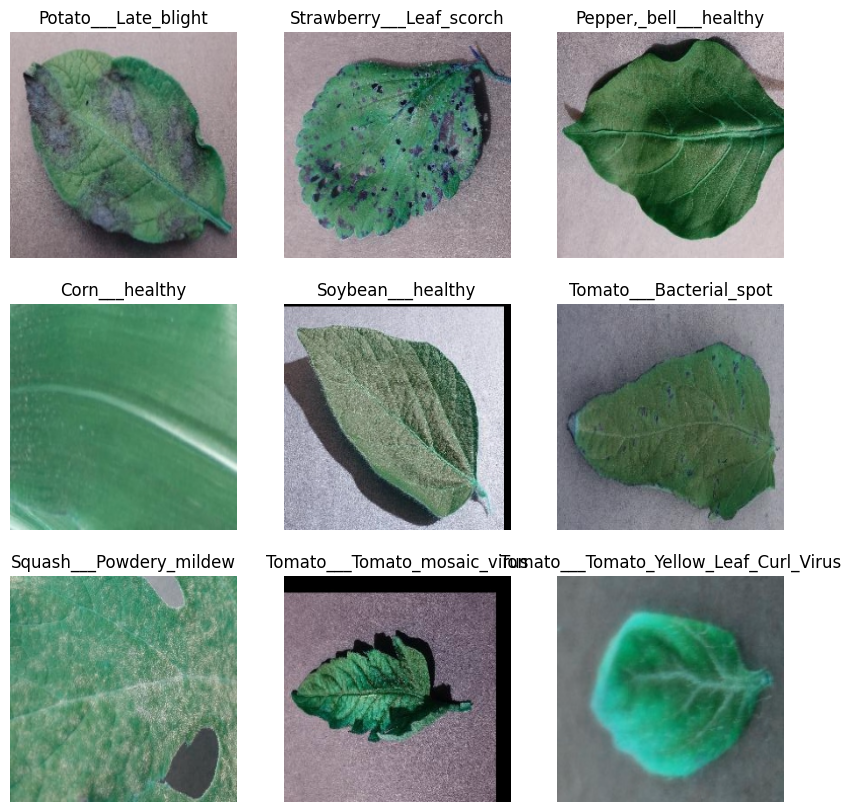

In [3]:
figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(list(training_data.label_to_idx.keys())[label])
    plt.axis("off")
    plt.imshow(img.swapaxes(0,2))
plt.show()

## Load Models

In [4]:
# ResNet50
resnet50 = models.resnet50(weights='ResNet50_Weights.DEFAULT')
for param in resnet50.parameters():
    param.requires_grad = False

# DenseNet201
densenet = models.densenet201(weights=models.DenseNet201_Weights.DEFAULT)
for param in densenet.parameters():
    param.requires_grad = False

# EfficientNetB0
efficientnet_b0 = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
for param in efficientnet_b0.parameters():
    param.requires_grad = False

# EfficientNetB3
efficientnet_b3 = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.IMAGENET1K_V1)
for param in efficientnet_b3.parameters():
    param.requires_grad = False

In [5]:
models_list = [resnet50, densenet, efficientnet_b0, efficientnet_b3]

## Linear Model

### ResNet50

In [8]:
import importlib
import utils
importlib.reload(utils.linear_model)
from utils.linear_model import train_linear_model

Epoch 1/10, Loss: 0.0541, Test Accuracy: 0.5159
Epoch 2/10, Loss: 0.0507, Test Accuracy: 0.6328
Epoch 3/10, Loss: 0.0495, Test Accuracy: 0.6931
Epoch 4/10, Loss: 0.0484, Test Accuracy: 0.7719
Epoch 5/10, Loss: 0.0476, Test Accuracy: 0.8066
Epoch 6/10, Loss: 0.0474, Test Accuracy: 0.8181
Epoch 7/10, Loss: 0.0473, Test Accuracy: 0.8272
Epoch 8/10, Loss: 0.0472, Test Accuracy: 0.8316
Epoch 9/10, Loss: 0.0472, Test Accuracy: 0.8256
Epoch 10/10, Loss: 0.0470, Test Accuracy: 0.8342


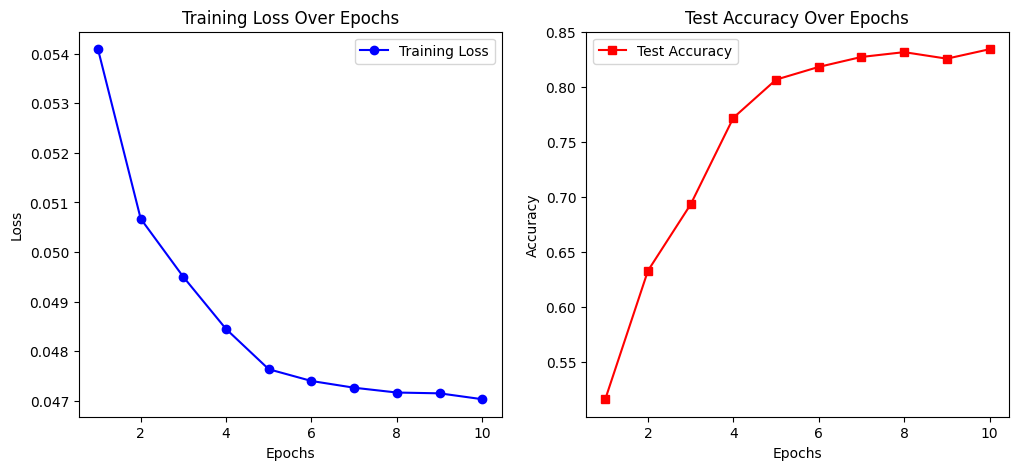

In [9]:
resnet50_classifier = train_linear_model(0, 
                                        input_dim_resnet, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

### Densenet

Epoch 1/10, Loss: 0.0539, Test Accuracy: 0.6223
Epoch 2/10, Loss: 0.0496, Test Accuracy: 0.6936
Epoch 3/10, Loss: 0.0486, Test Accuracy: 0.7750
Epoch 4/10, Loss: 0.0478, Test Accuracy: 0.7897
Epoch 5/10, Loss: 0.0474, Test Accuracy: 0.8102
Epoch 6/10, Loss: 0.0471, Test Accuracy: 0.8159
Epoch 7/10, Loss: 0.0470, Test Accuracy: 0.8225
Epoch 8/10, Loss: 0.0468, Test Accuracy: 0.8175
Epoch 9/10, Loss: 0.0468, Test Accuracy: 0.8250
Epoch 10/10, Loss: 0.0468, Test Accuracy: 0.8403


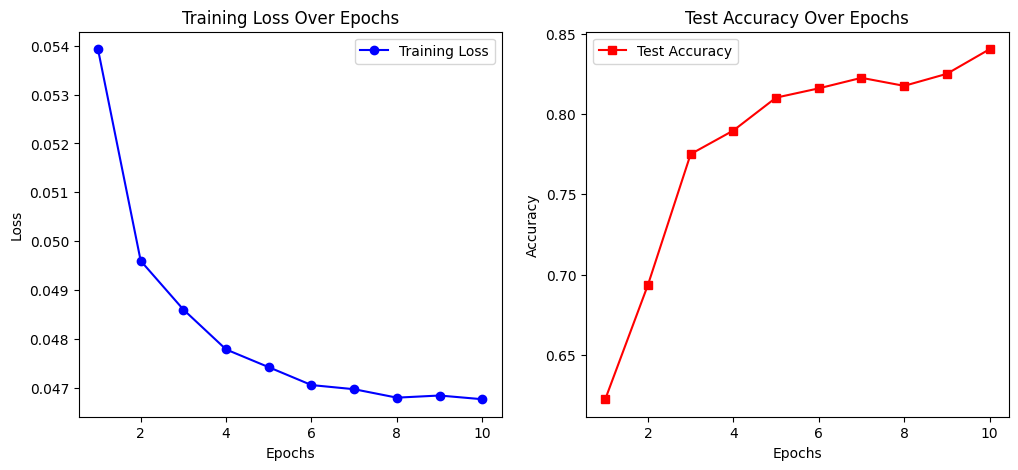

In [10]:
densenet_classifier = train_linear_model(1,
                                        input_dim_densenet, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

### EfficientNetB0

Epoch 1/10, Loss: 0.0543, Test Accuracy: 0.4728
Epoch 2/10, Loss: 0.0515, Test Accuracy: 0.5980
Epoch 3/10, Loss: 0.0501, Test Accuracy: 0.6431
Epoch 4/10, Loss: 0.0496, Test Accuracy: 0.6713
Epoch 5/10, Loss: 0.0487, Test Accuracy: 0.7559
Epoch 6/10, Loss: 0.0482, Test Accuracy: 0.7855
Epoch 7/10, Loss: 0.0476, Test Accuracy: 0.7783
Epoch 8/10, Loss: 0.0474, Test Accuracy: 0.8084
Epoch 9/10, Loss: 0.0471, Test Accuracy: 0.8169
Epoch 10/10, Loss: 0.0470, Test Accuracy: 0.8247


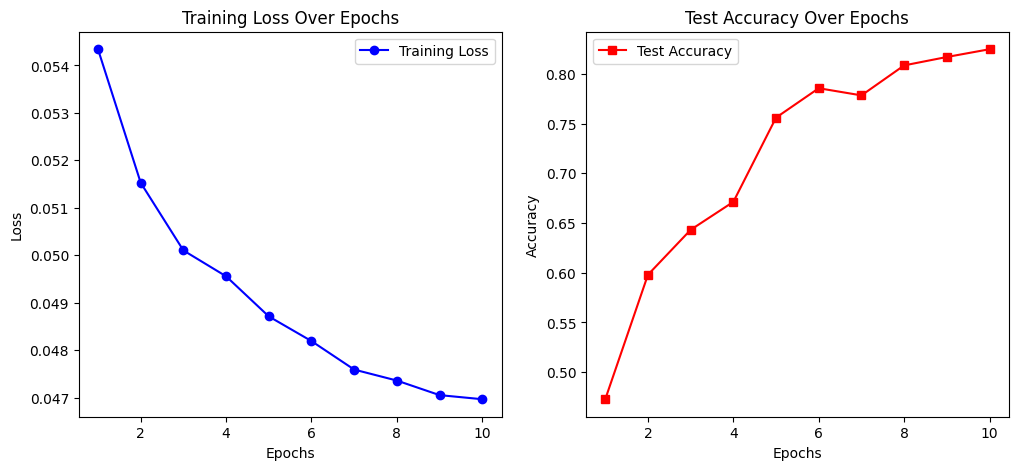

In [11]:
efficientnet_b0_classifier = train_linear_model(2, 
                                        input_dim_b0, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

### EfficientNetB3

Epoch 1/10, Loss: 0.0548, Test Accuracy: 0.4692
Epoch 2/10, Loss: 0.0516, Test Accuracy: 0.5559
Epoch 3/10, Loss: 0.0509, Test Accuracy: 0.6062
Epoch 4/10, Loss: 0.0501, Test Accuracy: 0.6737
Epoch 5/10, Loss: 0.0493, Test Accuracy: 0.7033
Epoch 6/10, Loss: 0.0487, Test Accuracy: 0.7322
Epoch 7/10, Loss: 0.0484, Test Accuracy: 0.7600
Epoch 8/10, Loss: 0.0481, Test Accuracy: 0.7664
Epoch 9/10, Loss: 0.0480, Test Accuracy: 0.7702
Epoch 10/10, Loss: 0.0479, Test Accuracy: 0.7798


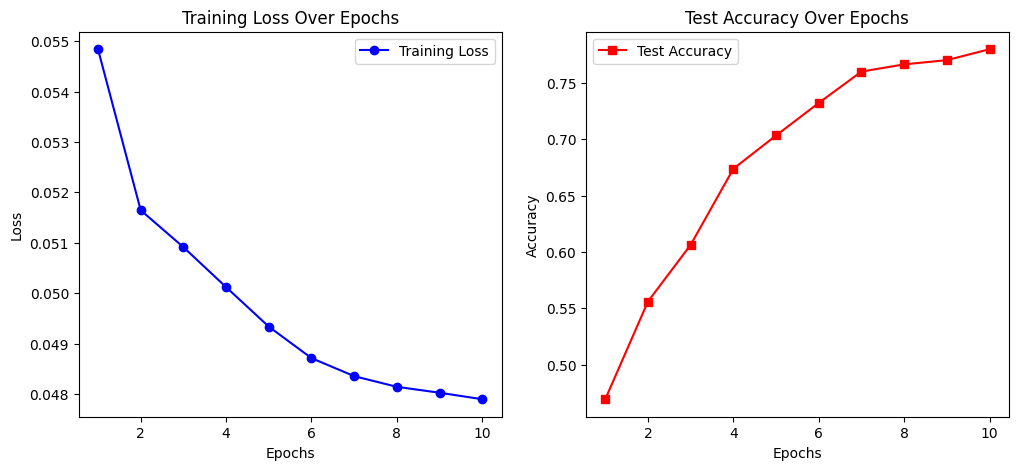

In [12]:
efficientnet_b3_classifier = train_linear_model(3, 
                                        input_dim_b3, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

## Save models

In [13]:
def save_model(model, path):
    torch.save(model.state_dict(), path)
    print(f"Final model saved to {path}")

In [14]:
# Paths for saving
densenet201_path = "densenet201.pth"
efficientnet_b0_path = "efficientnet_b0.pth"
efficientnet_b3_path = "efficientnet_b3.pth"
resnet50_path = "resnet50.pth"

In [15]:
save_model(resnet50_classifier, f'models_augmented/{resnet50_path}')
save_model(densenet_classifier, f'models_augmented/{densenet201_path}')
save_model(efficientnet_b0_classifier, f'models_augmented/{efficientnet_b0_path}')
save_model(efficientnet_b3_classifier, f'models_augmented/{efficientnet_b3_path}')

Final model saved to models_augmented/resnet50.pth
Final model saved to models_augmented/densenet201.pth
Final model saved to models_augmented/efficientnet_b0.pth
Final model saved to models_augmented/efficientnet_b3.pth


# Ensemble Learning

In [17]:
import importlib
import utils
importlib.reload(utils)
from utils.ensemble_model import train_ensemble_weights, WeightedEnsemble

In [18]:
# List of pretrained models
models_list = [resnet50, densenet, efficientnet_b0, efficientnet_b3]

# Define the ensemble
ensemble = WeightedEnsemble(models_list, output_dim)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([ensemble.weights], lr=0.01) 

# Train the ensemble weights
train_ensemble_weights(ensemble, criterion, optimizer, train_validation_dataloader, test_validation_dataloader)

Loss: 0.0148, Test Accuracy: 0.8733


In [20]:
# Evaluate on test set
correct = 0
total = 0
with torch.no_grad():
    # Early stopping
    steps_count = 100
    for i, (inputs, labels) in enumerate(test_validation_dataloader):

        inputs, labels = inputs.to(device), labels.to(device)
        
        # Initialize a zero tensor for averaging
        final_outputs = torch.zeros(inputs.size(0), output_dim).to(device)
        
        for model in models_list:
            model.eval()  # Ensure the model is in evaluation mode
            outputs = model(inputs).to(device)
            _, predicted = torch.max(final_outputs, 1)
            final_outputs += outputs  # Accumulate outputs from each model
        
        # Average the accumulated outputs
        final_outputs /= len(models_list)

        if steps_count == 0:
            break
        steps_count -= 1
        
        # Compute predictions and accuracy
        _, predicted = torch.max(final_outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate test accuracy
    test_accuracy = correct / total

    print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8706
